#**Python Tutorial on ANN model  for  Binary Classification Task using TensorFlow**

# Dr. Shyam Lal, NITK Surathkal, Karnataka,India

In this tutorial, we will take a quick look on how to use TensorFlow. We are following the steps given below:

1. Import the necessary libraries and dataset
2. Prepare data for processing
3. Create the model
4. Compile and Training the model
5. Visualization of training accuarcy and loss
6. Model evaluation and prediction
7. Performance evaluation of the model
8. ROC Plotting of the model


## Example  Task 1 (ANN): Breast Cancer Detection using  Breast Cancer Wisconsin (Diagnostic) Dataset

# Step 1: Importing necessary library packges

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: keras-vis, tensorflow


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


# Step 2: Data loading and preparation

###Source of Breast Cancer Wisconsin (Diagnostic) Dataset
\\
* UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
* https://www.kaggle.com/code/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann/input

In [3]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [5]:
# load dataset
dataset = pd.read_csv('/content/data.csv')
print(dataset)
del dataset['Unnamed: 32']
# dataset = pd.read_csv('/content/drive/MyDrive/FDP_DL/Social_Network_Ads.csv')
print(dataset)
# print('')
print(dataset.shape)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [7]:
X[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

In [8]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y.shape)
print(y)

(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1

## Example Task 2:  Predict wheather customer Purchased("1" or not-purchased product ("0") using Social Network Ads

In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/FDP_DL/Social_Network_Ads.csv')
# # dataset = pd.read_csv('Social_Network_Ads.csv')
# print(dataset.head())
# print('')
# print(dataset.shape)v

# ## Seprating data and ground truth
# X= np.array(dataset.iloc[:,2:4])
# y = np.array(dataset.iloc[:,4])
# print(X.shape)
# # print('input:',X)
# print(y.shape)
# # print('Target:',y)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


# Step 3: Creating Artifical Neural Network Models

Now we will create and configure the artifical neural network in 3 ways: sequential, functional and subclassing, and we take a look at the summary of the models. In this ANN model, we are creating:
1. One input layer
2. Two hidden layers with 16, 32 neurons respectively
3. One output layer with one neuron, because we are having one output  classe

In hidden layers, neurons use ReLU activation function, while in output layer neurons use Softmax activation function (ensuring that output values are in the range of 0 and 1).


# Kernel Initiazer in Keras framework in Tensorflow
*  keras package have < glorot_uniform as the default kernel initializer
* GlorotUniform, keras uses Glorot initialization with a uniform distribution.r = √(3/fan_avg) where
*fan_avg = (fan_in + fan_out) /2   and  
* where, fan_in is the number of inputs and  fan_out is the number of nurons in a layer

* https://keras.io/api/layers/initializers/
* https://www.tensorflow.org/api_docs/python/tf/keras/initializers
* https://wandb.ai/sayakpaul/weight-initialization-tb/reports/Effects-of-Weight-Initialization-on-Neural-Networks--Vmlldzo2ODY0NA


# Bias Initializer in Keras framework in Tensorflow
* Zeros' is the default value for the bias_initializer parameter.
* If we instead wanted to change this so that the biases were set to some other type of values, like all ones, or random numbers, then we can. Keras has a list of initializers that it supports

In [11]:
 # Usage in a Keras layer:
ker_initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=ker_initializer)

After we initialize these biases, we can get them out and inspect their values by calling model.layer[0].get_weights().

This gives us all the biases for the layer in the model. The list has 2 elements, of shape (input_dim, output_dim) and (output_dim,) for weights and biases respectively.

In [ ]:
## Creting model for binary classification task
model = Sequential()
weight_initializer = tf.keras.initializers.he_uniform()
bias_initializer = tf.keras.initializers.he_uniform()
model.add(Dense(4, input_dim = 30, kernel_initializer=weight_initializer, activation="tanh", use_bias=True,bias_initializer=bias_initializer))
# model.add(Dense(4, input_dim = 30, kernel_initializer='he_uniform', activation="tanh", use_bias=True,bias_initializer='he_uniform',
#                 name = 'layer_1'))
# model.add(Dense(8, kernel_initializer=weight_initializer, activation="tanh", use_bias=True,bias_initializer=bias_initializer))
# model.add(Dense(4, input_dim = 30, kernel_initializer='he_uniform', activation="tanh", use_bias=True,bias_initializer=bias_initializer,
#                 name = 'layer_1'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │             124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# x = np.random.randn(100)
# y = x*3 + np.random.randn(100)*0.8
## Creting model for Regression  task
# # model = Sequential()
# # model.add(Dense(4, input_dim = 1, activation = 'tanh', name = 'layer_1'))
# # model.add(Dense(1, activation = 'tanh', name = 'layer_2'))
# # model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
# # model.summary()


### get_weights()
Use the get_weights() function to get the weights and biases of the layers before training the model. These are the weights and biases with which the layers will be initialized.

In [ ]:
print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers before training the model: 

dense
Weights
Shape:  (30, 4) 
 [[-3.93828005e-01 -5.93048036e-02 -3.86778116e-01 -2.72858024e-01]
 [-4.08884585e-01 -1.31368577e-01 -2.04138845e-01 -1.59178376e-01]
 [ 1.55547202e-01 -2.23951504e-01  3.09248686e-01 -2.54447579e-01]
 [-3.13502133e-01 -3.20941746e-01  2.20221043e-01  3.59280944e-01]
 [ 4.27336872e-01  4.17141914e-02 -3.92677844e-01 -4.23431844e-01]
 [ 1.51466489e-01  1.74519420e-01  2.57651508e-02 -2.75330663e-01]
 [ 3.63643587e-01 -9.31740403e-02  1.73105896e-01  2.18095303e-01]
 [-2.26643875e-01 -3.69280815e-01 -1.22309595e-01 -4.17227596e-01]
 [-1.63371563e-01 -4.44212645e-01  5.98407984e-02  9.95022058e-02]
 [-2.68192828e-01  6.73032999e-02  1.65289938e-01  2.69013584e-01]
 [ 7.68638849e-02  4.34308648e-01  2.74291694e-01 -4.44989085e-01]
 [ 2.72767425e-01  4.14676011e-01 -2.94165462e-01 -1.66189849e-01]
 [ 2.43826628e-01 -3.44222665e-01 -3.04439306e-01 -3.99296969e-01]
 [ 2.72840261e-03  4.34508681e-01  

* Did you notice the shape of the weights and biases?
* Weights of a layer are of the shape (input x units) and biases are of the shape (units,).
* get_weights() function returned a list consisting of Numpy arrays.
* Index 0 of the list has the weights array and index 1 has the bias array.
* The model.add(Dense()) function has an argument kernel_initializer that initializes the weights matrix created by the layer.

https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/

https://androidkt.com/initialize-get-biases-keras-model/#:~:text=Bias%20Initializer&text='zeros'%20is%20the%20default%20value,of%20initializers%20that%20it%20supports.

##Visualising the initialised weights and biases
Finally, we can see the effect of our initialisers on the weights and biases by plotting histograms of the resulting values. Compare these plots with the selected initialisers for each layer above.

In [ ]:
inp = Input(shape=(30,))
bias_initializer = tf.keras.initializers.he_uniform()
# x = Flatten()(inp)      ## if input data is in the 2d matrix form( i.e. image data)
x1 = Dense(16, kernel_initializer='he_uniform', activation="tanh",use_bias=True,bias_initializer=bias_initializer,name = 'layer_1')(inp)
x2 = Dense(32, kernel_initializer='he_uniform', activation="tanh",use_bias=True,bias_initializer="zero",name = 'layer_2')(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)
# model_ann2 = Model(inp, out)
model = Model(inputs=inp, outputs=out)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.python.framework.tensor_spec import DenseSpec
inp = Input(shape=(30,))
bias_initializer = tf.keras.initializers.he_uniform()
x1 = Dense(16, kernel_initializer='he_uniform', activation = "tanh", use_bias=True, bias_initializer=bias_initializer, name='layer1')(inp)
x2 = Dense(32, kernel_initializer='he_uniform', activation="tanh", use_bias=True, bias_initializer="zero", name='layer2')(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)
model2 = Model(inputs=inp, outputs=out)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 layer1 (Dense)              (None, 16)                496       
                                                                 
 layer2 (Dense)              (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1073 (4.19 KB)
Trainable params: 1073 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


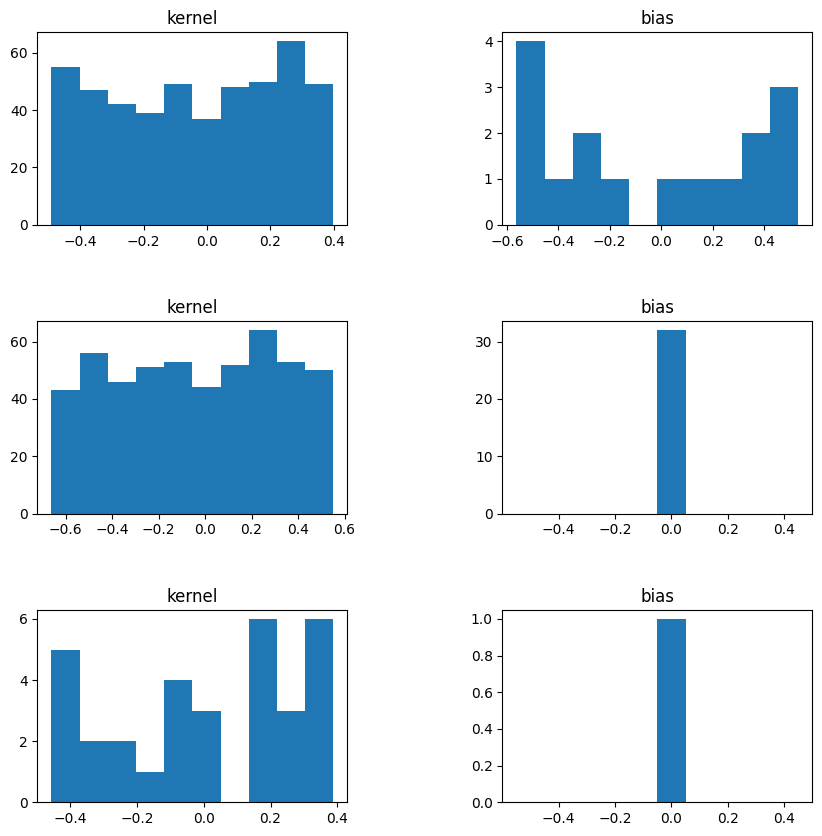

In [ ]:
# Plot histograms of weight and bias values

fig, axes = plt.subplots(3, 2, figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

# Method-1: Sequential model

In [ ]:
# # Define model
# model_ann1 = Sequential()
# model_ann1.add(Dense(16, input_dim=30, kernel_initializer='he_uniform',activation= "tanh"))
# model_ann1.add(Dense(32, kernel_initializer='he_uniform', activation= "tanh"))
# model_ann1.add(Dense(1, kernel_initializer='he_uniform', activation= "sigmoid"))
# model_ann1.summary() #Print model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1073 (4.19 KB)
Trainable params: 1073 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Method-2: Functional model

In [ ]:
inp = Input(shape=(30,))
# x = Flatten()(inp)      ## if input data is in the 2d matrix form( i.e. image data)
x1 = Dense(16, kernel_initializer='he_uniform', activation="tanh")(inp)
x2 = Dense(32,kernel_initializer='he_uniform', activation="tanh")(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)
# model_ann2 = Model(inp, out)
model_ann2 = Model(inputs=inp, outputs=out)
model_ann2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

# Method-3: Subclassing model

In [ ]:
# class CustomModel:
#     def __init__(self):
#         # self.flatten = Flatten()
#         self.dense1 = Dense(16, kernel_initializer='he_uniform', activation="tanh" )
#         self.dense2 = Dense(32, kernel_initializer='he_uniform', activation="tanh")
#         self.dense3 = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")

#     def call(self, shape):
#         self.inp = Input(shape)
#         # x = self.flatten(self.inp)
#         x = self.dense1(self.inp)
#         x = self.dense2(x)
#         final = self.dense3(x)
#         model = Model(inputs = self.inp, outputs = final)
#         return model
# m = CustomModel()
# model_ann3 = m.call(shape=(30,))
# model_ann3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_27 (Dense)            (None, 16)                496       
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


### Step 4: Compile and train the model

Compiling the ANN model, where we define our cost function and optimizer. In this instance, we are using Adam optimizer with a logarithmic cost function (called categorical_crossentropy in tensorflow) and then training the model.

In [ ]:
# comple the model
model_ann2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


# #fitting the model and predicting
history_ann= model_ann2.fit(X_train,y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test), verbose=1)
# history_ann= model_ann3.fit(x_train,y_train, epochs=10, batch_size=4,  verbose=1)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8116 - loss: 0.4244 - val_accuracy: 0.9211 - val_loss: 0.2185
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9648 - loss: 0.1541 - val_accuracy: 0.9123 - val_loss: 0.1735
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1116 - val_accuracy: 0.9211 - val_loss: 0.1530
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0996 - val_accuracy: 0.9298 - val_loss: 0.1404
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.0970 - val_accuracy: 0.9386 - val_loss: 0.1320
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.0836 - val_accuracy: 0.9386 - val_loss: 0.1250
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.0947 - val_accuracy: 0.9474 - val_loss: 0.1197
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.0785 - val_accuracy: 0

### Step 5: Visualization of training  Accuracy  and loss of the model

Visualizing training and validation loss and accuracy of the artifical neural networks.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0, 0.5, 'Loss')

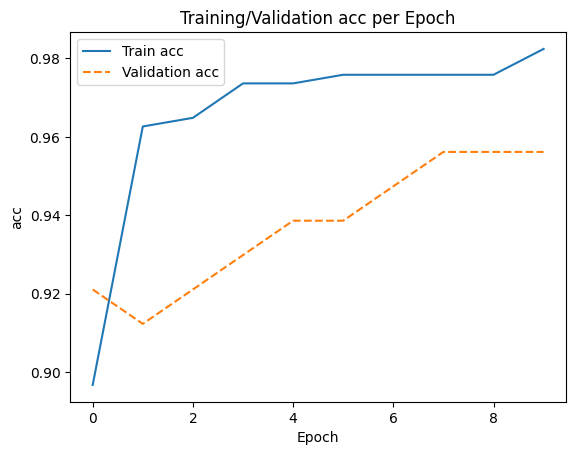

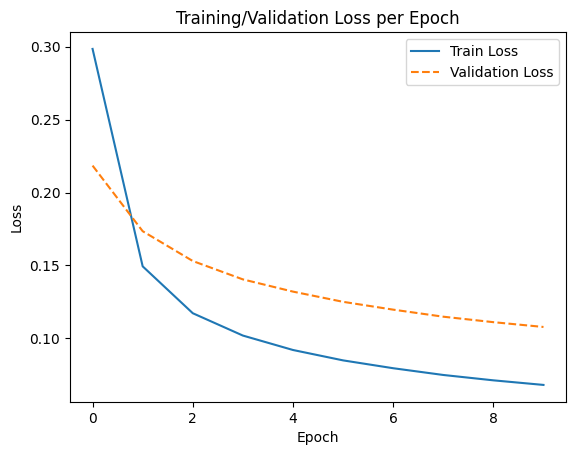

In [ ]:
# Plot the model accuracy on training and validation data
print(history_ann.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(history_ann.history['accuracy'])
ax.plot(history_ann.history['val_accuracy'], '--')
ax.legend(['Train acc', 'Validation acc'])
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

# Plot the model loss on training and validation data
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(history_ann.history['loss'], )
ax.plot(history_ann.history['val_loss'], '--')
ax.legend(['Train Loss', 'Validation Loss'])
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

### Step 6(a): Model evaluation

Evaluating the ANN model on test data

In [ ]:
score = model_ann2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10779426246881485
Test accuracy: 0.9561403393745422


### Step 6(b): Model Prediction

In [ ]:
y_pred= model_ann2.predict(X_test)
## Thresholding Rule
y_pred=np.where(y_pred>0.5,1,0)
print(y_pred.shape)
print(y_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
(114, 1)
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]


### Step 7: Performance evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test,y_pred)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test,y_pred)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix: 
[[65  2]
 [ 3 44]]


### Comparison

In [ ]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original","Predict"])
calculation

,Original,Predict
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,0
110,0,0
111,1,1
112,1,1


# Method -2: Implementation from Scikit Library

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(16,32),
                        max_iter = 10,activation = "tanh",
                        solver = 'sgd')
mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 32), max_iter=10,
              solver='sgd')

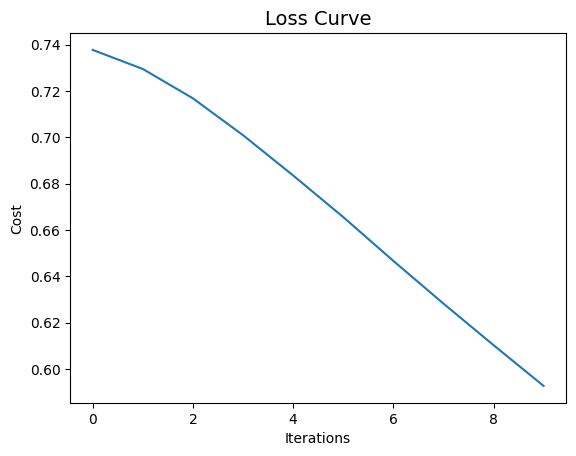

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# y_pred = regressor.predict(X_test)
y_pred_sk =mlp_clf.predict(X_test)   #round(1) means singe decimal place
print(y_pred_sk)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0]


In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
calculation2 = pd.DataFrame(np.c_[y_test,y_pred_sk], columns = ["Original","Predict"])
calculation2

,Original,Predict
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,0
110,0,0
111,1,0
112,1,0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test,y_pred_sk)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test,y_pred_sk)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        67
           1       0.77      0.36      0.49        47

    accuracy                           0.69       114
   macro avg       0.72      0.64      0.64       114
weighted avg       0.71      0.69      0.66       114

Confusion Matrix: 
[[62  5]
 [30 17]]


##Comparison between SK Learn and DNN DL Library

In [ ]:
calculation3 = pd.DataFrame(np.c_[y_test,y_pred, y_pred_sk], columns = ["Original"," ANN Predict", "SK Predict"])
calculation3

,Original,ANN Predict,SK Predict
0,1,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
109,1,1,1
110,0,0,0
111,1,1,1
112,1,1,1
